<a href="https://colab.research.google.com/github/mfmarlonferrari/NietzscheLLM/blob/main/IntroLLMTransformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Transformers

**Entendendo a motivação: Como funcionam as RNNs tradicionais** 🤔

As RNNs tradicionais leêm uma palavra por vez para realizar as etapas de predição de palavras futuras, que dependem de palavras passadas que podem possuir um **gap grande de distância entre a palavra analisada e as palavras que ela precisa entender o contexto**.

Por exemplo, imagine que no exemplo a seguir, para uma RNN prever a palavra "dados" ela teria que processar todas as palavras anteriores, tal como: extrair, insights e assim por diante.

**"Eu vou extrair os insights no banco de dados."**

Em contraste, o Transformer executa apenas um número pequeno e constante de etapas (escolhidas empiricamente). Em cada etapa, aplica um mecanismo de **autoatenção** que modela diretamente as relações entre todas as palavras de uma frase, independentemente de sua respectiva posição. No exemplo anterior “Eu vou extrair os insights no banco de dados”, para determinar que a palavra "dados" se refere ao banco de dados e não dados de um jogo de tabuleiro, **o Transformer pode aprender a atender imediatamente à palavra "extrair" e tome essa decisão em uma única etapa**.

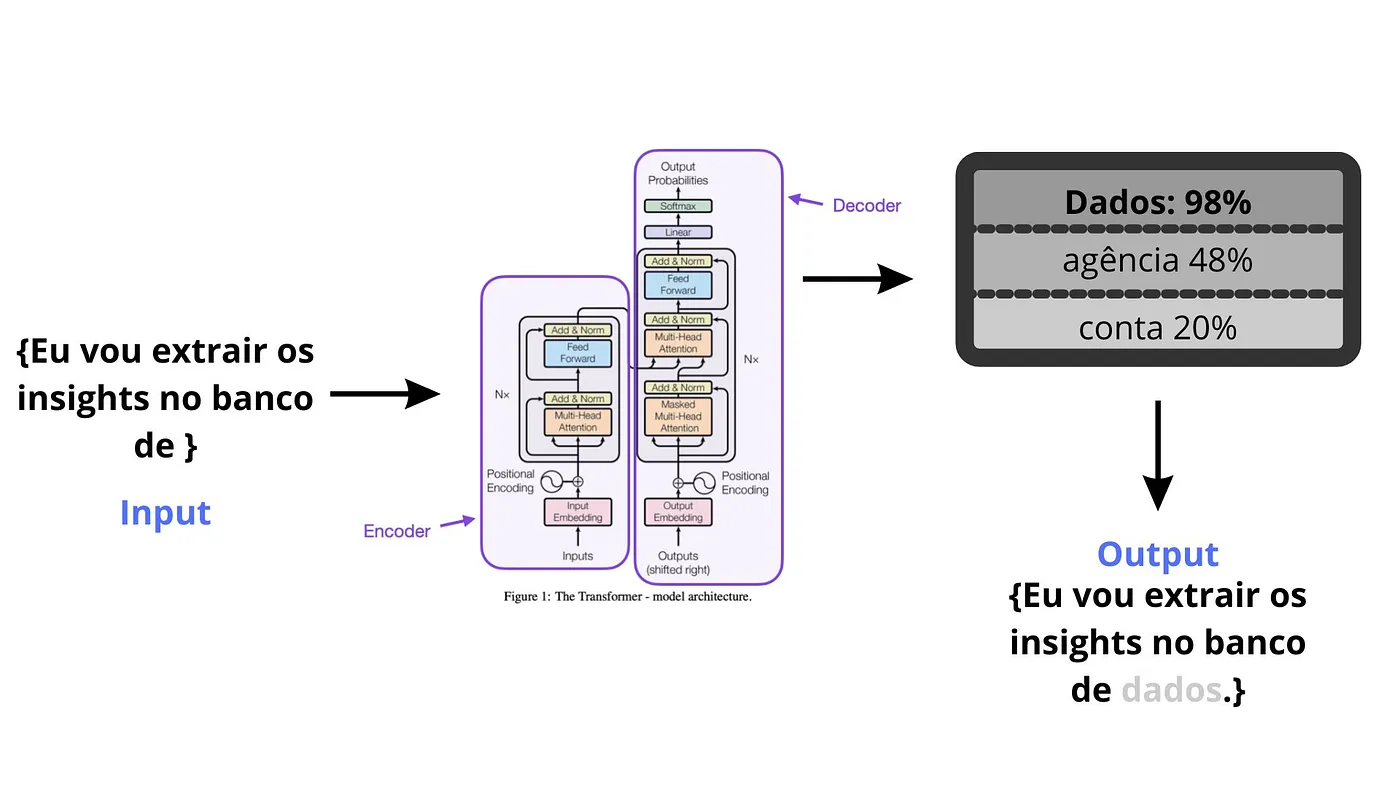

Mais especificamente, para calcular a próxima representação para uma determinada palavra - “dados”, por exemplo - o Transformer compara-a com todas as outras palavras da frase. O resultado dessas comparações é uma **pontuação de atenção para todas as outras palavras da frase**. Estas pontuações de atenção determinam o quanto cada uma das outras palavras deve contribuir para a próxima representação de “dados”. No exemplo, o “banco” desambiguante poderia receber uma pontuação de atenção elevada ao calcular uma nova representação para “dados”. **As pontuações de atenção são então utilizadas como pesos para uma média ponderada de todas as representações de palavras**, que é alimentada numa rede totalmente ligada para gerar uma nova representação para dados, refletindo que a frase se refere à banco de dados.

As redes neurais para tradução automática normalmente contêm um **codificador** que lê a frase de entrada e gera uma representação dela. Um **decodificador** então gera a frase de saída palavra por palavra enquanto consulta a representação gerada pelo codificador. O Transformer começa gerando representações iniciais, ou embeddings, para cada palavra. Em seguida, **utilizando a autoatenção**, agrega informações de todas as outras palavras, gerando uma nova representação por palavra informada por todo o contexto. Esta etapa é então repetida várias vezes em paralelo para todas as palavras, gerando sucessivamente novas representações.

O decodificador funciona de forma semelhante, mas gera uma palavra por vez, da esquerda para a direita. Atende não apenas às demais palavras geradas anteriormente, mas também às representações finais geradas pelo codificador.


**Modelos probabilisticos**

Sobre o modelo Transformer

Um modelo de **Transformer** é uma arquitetura de rede neural projetada para tarefas de processamento de linguagem natural (NLP) e outras tarefas sequenciais, como tradução automática, resumo de texto, geração de texto e muito mais. Ele se destaca por sua capacidade de capturar **relações de longo alcance em sequências de entrada sem depender de estruturas sequenciais fixas, como as encontradas em modelos recorrentes**.

## Entendendo o Encoding

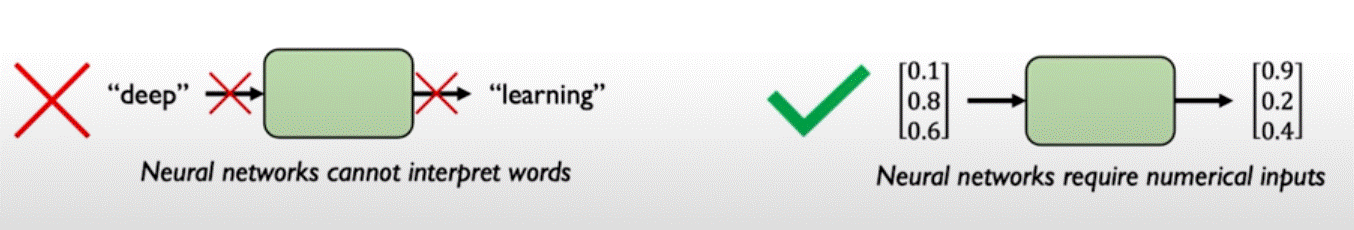

In [ ]:
texto = 'Eu vou extrair os insights no banco de dados.'
caracteres = sorted(list(set(texto)))
print(caracteres)
print('Tamanho do seu vocabulário >> ', len(caracteres))

In [ ]:
letraParaIndex = { lt:i for i,lt in enumerate(caracteres) }
IndexParaLetra = { i:lt for i,lt in enumerate(caracteres) }

encode = lambda s: [letraParaIndex[c] for c in s] # encoder
decode = lambda l: ''.join([IndexParaLetra[i] for i in l]) # decoder

print(encode("Eu vou extrair os insights no banco de dados."))
print(decode(encode("Eu vou extrair os insights no banco de dados.")))

In [ ]:
print(encode("Eu vou"))
print(decode(encode("Eu vou")))

### Encoding por palavras

In [ ]:
import pandas as pd
import numpy as np

texto = {'texto':[
    'Eu vou extrair os insights no banco de dados.',
    'Eu vou extrair dados no banco de dados.',
]}
texto = pd.DataFrame(texto)
texto

In [ ]:
texto["texto"].str.get_dummies(" ")

### Tokenização eficiente
https://github.com/openai/tiktoken

In [ ]:
!pip install tiktoken

In [ ]:
import tiktoken
enc = tiktoken.get_encoding("gpt2")
enc.encode('Eu vou extrair os insights no banco de dados.')

In [ ]:
#Nosso encoder improvisado
print(encode('Eu vou extrair os insights no banco de dados.'))

# Criando um RAG (Retrieve Augmented Generation) com o modelo Gemini 📝
A RAG permite que o LLM acesse e processe informações de bases de conhecimento externas, como artigos científicos, notícias, documentos técnicos ou bancos de dados específicos da empresa. Isso garante que as **respostas do modelo sejam baseadas em fatos confiáveis e atualizados**, provenientes de fontes confiáveis e relevantes para a consulta do usuário. (ou seja, o modelo não alucina inventando respostas).

Com base nas informações recuperadas, o LLM utiliza técnicas avançadas de **processamento de linguagem natural (PLN)** para gerar respostas completas, informativas e relevantes para a consulta do usuário. Essa etapa garante que o texto final seja fluente, coerente e de alta qualidade, atendendo às expectativas do usuário e transmitindo a mensagem de forma clara e precisa.


# Vamos criar um modelo de LLM com RAG? ✏️

Primeiro passo, é criar sua API key no ambiente da google:

Criar sua chave de API no Google Studio: https://aistudio.google.com/app/apikey

# **Gerador de embeddings** 📊

models/embedding-001

Link: https://ai.google.dev/gemini-api/tutorials/document_search?hl=pt-br


# **O Desafio**💪

Vamos carregar um conteúdo PDF para alimentar nossa LMM com RAG e gerar o conteúdo a partir dessa base de conhecimento.


# Steando a chave da API do Gemini 🔑
Para iniciar a construção do nosso chatbot inteligente, vamos adicionar a API KEY da google dentro do ambiente do google colab.

In [ ]:
#!pip install -U -q google-generativeai

In [ ]:
#Importações e configurações iniciais
import numpy as np
import pandas as pd
import google.generativeai as genai
from google.colab import userdata

api_key = userdata.get('API_KEY')
genai.configure(api_key=api_key)

In [ ]:
for m in genai.list_models():
  if 'embedContent' in m.supported_generation_methods:
    print(m.name)

# Exemplo de embedding

In [ ]:
#Exemplo de embedding
title = "Nesta aula você está aprendendo sobre embeddings, LLM e RAG"
sample_text = (
    "Artigo completo:\n"
    "\n"
    "A RAG permite que o LLM acesse e processe informações de bases de conhecimento externas, como artigos científicos, notícias, documentos técnicos ou bancos de dados específicos da empresa. Isso garante que as respostas do modelo sejam baseadas em fatos confiáveis e atualizados, provenientes de fontes confiáveis e relevantes para a consulta do usuário. ")

embeddings = genai.embed_content(model="models/embedding-001",
                                 content=sample_text,
                                 title=title,
                                 task_type="RETRIEVAL_DOCUMENT")

print(embeddings)

# Gerando um embedding a partir de um documento: Cardápitio Fitness 🚵‍♀️

In [ ]:
!pip install PyPDF2

In [ ]:
import pandas as pd
from PyPDF2 import PdfReader

def ler_pdf(caminho_arquivo):
    """
    Lê um arquivo PDF e retorna um dicionário com título e conteúdo.

    Argumentos:
        caminho_arquivo (str): Caminho para o arquivo PDF.

    Retorna:
        dict: Dicionário com as chaves "titulo" e "conteudo".
    """

    # Abrir o arquivo PDF
    with open(caminho_arquivo, 'rb') as arquivo:
        leitor = PdfReader(arquivo)

        # Obter o título do PDF (metadados)
        titulo = leitor.metadata.get('/Title') or 'Sem título'

        # Extrair o conteúdo do PDF
        texto = ''
        for pagina in leitor.pages:
            texto += pagina.extract_text()

    # Retornar dicionário com título e conteúdo
    return {'titulo': titulo, 'conteudo': texto}

def armazenar_resultados():
    """
    Armazena os resultados extraídos dos PDFs em um DataFrame.

    Retorna:
        pd.DataFrame: DataFrame contendo os dados dos PDFs.
    """

    # Criar lista vazia para armazenar dados dos PDFs
    dados = []

    # Ler cada PDF e adicionar ao dataframe
    for arquivo in ['Sugestão de cardápio fitness.pdf']:
        dados_pdf = ler_pdf(arquivo)
        dados.append(dados_pdf)

    # Criar dataframe a partir da lista
    df = pd.DataFrame(dados)

    # Salvar dataframe (opcional)
    df.to_csv('dados_pdf.csv', index=False)

    return df

df = armazenar_resultados()

In [ ]:
df.head()

In [ ]:
model = "models/embedding-001"

def embed_fn(title, text):
  return genai.embed_content(model=model,
                                 content=text,
                                 title=title,
                                 task_type="RETRIEVAL_DOCUMENT")["embedding"]

df["Embeddings"] = df.apply(lambda row: embed_fn(row["titulo"], row["conteudo"]), axis=1)
df.head()

In [ ]:
def gerar_e_buscar_consulta(consulta, base, model):
  embedding_da_consulta = genai.embed_content(model=model,
                                 content=consulta,
                                 task_type="RETRIEVAL_QUERY")["embedding"]

  produtos_escalares = np.dot(np.stack(base["Embeddings"]), embedding_da_consulta)

  indice = np.argmax(produtos_escalares)
  return df.iloc[indice]["conteudo"]

In [ ]:
consulta = "Qual é a sugestão do cardápio fitness?"

trecho = gerar_e_buscar_consulta(consulta, df, model)
print(trecho)

# Criando um chat utilizando RAG

RAG é a utillização de uma modelo generativo combinando um conteúdo existente. Essa técnica é bem interessante pois une um conteúdo verdadeiro com a criatividade de um modelo generativo. Bacana, né?

In [ ]:
generation_config = {
  "temperature": 0.8, # Esse parâmetro controla a aleatoriedade do texto gerado
  "candidate_count": 1, # Especifica o número de tentativas independentes de geração de texto (candidatos) a serem consideradas.
  "top_p": 0.90, # Controla a distribuição de probabilidade usada para amostrar a próxima palavra.
  "top_k": 10, # Limita o tamanho do vocabulário considerado para gerar a próxima palavra
  "max_output_tokens": 500 # Define o número máximo de tokens (palavras) que o texto gerado pode ter.
}

prompt = f"Reescreva esse texto de uma forma mais descontraída, sem adicionar informações que não façam parte do texto: {trecho}"

model_RAG = genai.GenerativeModel("gemini-1.0-pro",
                                generation_config=generation_config)
response = model_RAG.generate_content(prompt)
print(response.text)